In [2]:
import os
import subprocess as sb
COLAB=True
if COLAB==True:
  from google.colab import drive
  drive.mount('/content/drive')
    #pwd=/content
  sb.run('mkdir -p drive/MyDrive/IQNx4/utils', shell=True)
  os.environ["IQN_BASE"] = os.path.join(os.getcwd(), 'drive', 'MyDrive', 'IQNx4')
  os.environ["DATA_DIR"] = os.path.join(os.getcwd(), 'drive', 'MyDrive', 'IQNx4')
  sp=sb.Popen('tree drive/MyDrive', shell=True, stdout=sb.PIPE, stderr=sb.PIPE)
  out,err=sp.communicate(); print('\n', out)
  print('Downloading Environment')#sudo apt update && sudo apt upgrade && 
  sb.run('sudo apt-get update && sudo apt install wget pandoc dvipng texlive-xetex texlive-fonts-recommended cm-super', shell=True)
  #download utils.py from github
  utils_url='https://raw.githubusercontent.com/AliAlkadhim/torchQN/master/utils/utils.py'
  sb.run('wget %s drive/MyDrive/IQNx4/utils' % utils_url, shell=True)
 

Mounted at /content/drive

 b''


In [3]:
!nvidia-smi

Thu Jan 19 01:38:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          4
On-line CPU(s) list:             0-3
Thread(s) per core:              2
Core(s) per socket:              2
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           85
Model name:                      Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:                        3
CPU MHz:                         2000.186
BogoMIPS:                        4000.37
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       64 KiB
L1i cache:                       64 KiB
L2 cache:                        2 MiB
L3 cache:                        38.5 MiB
NUMA node0 CPU(s):               0-3
Vulnerability 

In [5]:
import numpy as np
import pandas as pd

# import scipy as sp; import scipy.stats as st
import torch
import torch.nn as nn

print(f"using torch version {torch.__version__}")#old torch version: 1.9.0
# use numba's just-in-time compiler to speed things up
# from numba import njit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as mp

print("matplotlib version= ", mp.__version__)

import matplotlib.pyplot as plt

# reset matplotlib stle/parameters
import matplotlib as mpl

# reset matplotlib parameters to their defaults
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("seaborn-deep")
mp.rcParams["agg.path.chunksize"] = 10000
font_legend = 15
font_axes = 15
%matplotlib inline
import sys
#or use joblib for caching on disk
from joblib import  Memory
# from IPython.display import Image, display
# from importlib import import_module
# import plotly
try:
    import optuna

    print(f"using (optional) optuna version {optuna.__version__}")
except Exception:
    print("optuna is only used for hyperparameter tuning, not critical!")
    pass
import argparse
import time

# import sympy as sy
# import ipywidgets as wid;


# try:
#     IQN_BASE = os.environ["IQN_BASE"]
#     print("BASE directoy properly set = ", IQN_BASE)
#     utils_dir = os.path.join(IQN_BASE, "utils/")
#     sys.path.append(utils_dir)
#     import utils

#     # usually its not recommended to import everything from a module, but we know
#     # whats in it so its fine
#     from utils import *

#     print("DATA directory also properly set, in %s" % os.environ["DATA_DIR"])
# except Exception:
#     # IQN_BASE=os.getcwd()
#     print(
#         """\nBASE directory not properly set. Read repo README.    If you need a function from utils, use the decorator below, or add utils to sys.path\n
#     You can also do 
#     os.environ['IQN_BASE']=<ABSOLUTE PATH FOR THE IQN REPO>
#     or
#     os.environ['IQN_BASE']=os.getcwd()"""
#     )
#     pass




# from IPython.core.magic import register_cell_magic


# @debug
# def get_model_params_simple():
#     dropout=0.2
#     n_layers = 2
#     n_hidden=32
#     starting_learning_rate=1e-3
#     print('n_iterations, n_layers, n_hidden, starting_learning_rate, dropout')
#     return n_iterations, n_layers, n_hidden, starting_learning_rate, dropout


# update fonts
FONTSIZE = 14
font = {"family": "serif", "weight": "normal", "size": FONTSIZE}
mp.rc("font", **font)

# set usetex = False if LaTex is not
# available on your system or if the
# rendering is too slow
mp.rc("text", usetex=True)

# set a seed to ensure reproducibility
# seed = 128
# rnd  = np.random.RandomState(seed)
# sometimes jupyter doesnt initialize MathJax automatically for latex, so do this:
#######



IQN_BASE = os.environ["IQN_BASE"]
print("\nBASE directoy properly set = ", IQN_BASE)
utils_dir = os.path.join(IQN_BASE, "utils/")
sys.path.append(utils_dir)
import utils

# usually its not recommended to import everything from a module, but we know
# whats in it so its fine
from utils import *

DATA_DIR = os.environ["DATA_DIR"]
print(f"using DATA_DIR={DATA_DIR}")

memory = Memory(DATA_DIR)
################################### SET DATA CONFIGURATIONS ###################################

y_label_dict = {
    "RecoDatapT": "$p(p_T)$" + " [ GeV" + "$^{-1} $" + "]",
    "RecoDataeta": "$p(\eta)$",
    "RecoDataphi": "$p(\phi)$",
    "RecoDatam": "$p(m)$" + " [ GeV" + "$^{-1} $" + "]",
}

loss_y_label_dict = {
    "RecoDatapT": "$p_T^{reco}$",
    "RecoDataeta": "$\eta^{reco}$",
    "RecoDataphi": "$\phi^{reco}$",
    "RecoDatam": "$m^{reco}$",
}

X = ["genDatapT", "genDataeta", "genDataphi", "genDatam", "tau"]

# set order of training:
# pT_first: pT->>m->eta->phi
# m_first: m->pT->eta->phi


ORDER = "m_First"

if ORDER == "m_First":
    FIELDS = {
        "RecoDatam": {
            "inputs": X,
            "xlabel": r"$m$ (GeV)",
            "ylabel": "$m^{reco}$",
            "xmin": 0,
            "xmax": 25,
        },
        "RecoDatapT": {
            "inputs": ["RecoDatam"] + X,
            "xlabel": r"$p_T$ (GeV)",
            "ylabel": "$p_T^{reco}$",
            "xmin": 20,
            "xmax": 80,
        },
        "RecoDataeta": {
            "inputs": ["RecoDatam", "RecoDatapT"] + X,
            "xlabel": r"$\eta$",
            "ylabel": "$\eta^{reco}$",
            "xmin": -5,
            "xmax": 5,
        },
        "RecoDataphi": {
            "inputs": ["RecoDatam", "RecoDatapT", "RecoDataeta"] + X,
            "xlabel": r"$\phi$",
            "ylabel": "$\phi^{reco}$",
            "xmin": -3.2,
            "xmax": 3.2,
        },
    }
elif ORDER== "phi_first":
    FIELDS = {
        "RecoDataphi": {
        "inputs": X,
        "xlabel": r"$\phi$",
        "ylabel": "$\phi^{reco}$",
        "xmin": -3.2,
        "xmax": 3.2,
    },

    "RecoDatam": {
        "inputs": ['RecoDataphi'] + X,
        "xlabel": r"$m$ (GeV)",
        "ylabel": "$m^{reco}$",
        "xmin": 0,
        "xmax": 25,
    },
    "RecoDatapT": {
        "inputs": ["RecoDataphi", "RecoDatam"] + X,
        "xlabel": r"$p_T$ (GeV)",
        "ylabel": "$p_T^{reco}$",
        "xmin": 20,
        "xmax": 80,
    },
    "RecoDataeta": {
        "inputs": ["RecoDataphi", "RecoDatam", "RecoDatapT"]  + X,
        "xlabel": r"$\eta$",
        "ylabel": "$\eta^{reco}$",
        "xmin": -5,
        "xmax": 5,
    },

    }


# Load and explore raw (unscaled) dataframes


all_variable_cols = [
    "genDatapT",
    "genDataeta",
    "genDataphi",
    "genDatam",
    "RecoDatapT",
    "RecoDataeta",
    "RecoDataphi",
    "RecoDatam",
]
all_cols = [
    "genDatapT",
    "genDataeta",
    "genDataphi",
    "genDatam",
    "RecoDatapT",
    "RecoDataeta",
    "RecoDataphi",
    "RecoDatam",
    "tau",
]


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device='cpu'
print(f'device is {device}' )

using torch version 1.13.1+cu116
matplotlib version=  3.2.2
optuna is only used for hyperparameter tuning, not critical!

BASE directoy properly set =  /content/drive/MyDrive/IQNx4
using torch version 1.13.1+cu116
matplotlib version=  3.2.2
optuna is only used for hyperparameter tuning, not critical!
BASE directoy properly set =  /content/drive/MyDrive/IQNx4
DATA directory also properly set, in /content/drive/MyDrive/IQNx4
using DATA_DIR=/content/drive/MyDrive/IQNx4
device is cuda


# 2.2: Load Required Functions

In [10]:
################################### Load unscaled dataframes ###################################
################################### Load unscaled dataframes ###################################
@memory.cache
def load_raw_data():
    """Load raw train, test, and validation raw (unscaled) dataframes, in that order.

    Returns:
        list(pandas.DataFrame): train, test, valid raw datafranes
    """
    print(f'SUBSAMPLE = {SUBSAMPLE}')
    raw_train_data=pd.read_csv(os.path.join(DATA_DIR,'train_data_10M_2.csv'),
                        usecols=all_cols,
                        nrows=SUBSAMPLE
                        )

    raw_test_data=pd.read_csv(os.path.join(DATA_DIR,'test_data_10M_2.csv'),
                        usecols=all_cols,
                        nrows=SUBSAMPLE
                        )

    raw_valid_data=pd.read_csv(os.path.join(DATA_DIR,'validation_data_10M_2.csv'),
                        usecols=all_cols,
                        nrows=SUBSAMPLE
                        )


    print('\n RAW TRAIN DATA SHAPE\n')
    print(raw_train_data.shape)
    print('\n RAW TRAIN DATA\n')
    raw_train_data.describe()#unscaled
    print('\n RAW TEST DATA\ SHAPEn')
    print(raw_test_data.shape)
    print('\n RAW TEST DATA\n')
    raw_test_data.describe()#unscaled

    return raw_train_data, raw_test_data, raw_valid_data


########## Generate scaled data###############
# scaled_train_data = L_scale_df(raw_train_data, title='scaled_train_data_10M_2.csv',
#                              save=True)
# print('\n\n')
# scaled_test_data = L_scale_df(raw_test_data,  title='scaled_test_data_10M_2.csv',
#                             save=True)
# print('\n\n')

# scaled_valid_data = L_scale_df(raw_valid_data,  title='scaled_valid_data_10M_2.csv',
#                             save=True)

# explore_data(df=scaled_train_data, title='Braden Kronheim-L-scaled Dataframe', scaled=True)

################ Load scaled data##############
@utils.time_type_of_func(tuning_or_training='loading')
@memory.cache
def load_scaled_dataframes():
    """Load L-scaled train, test and validation according to Braden scaling, in that order.

    Returns:
        list(pandas.DataFarme): L-scaled train, test, validation dataframes, in that order.
    """
    # print("SCALED TRAIN DATA")
    scaled_train_data = pd.read_csv(
        os.path.join(DATA_DIR, "scaled_train_data_10M_2.csv"),
        usecols=all_cols,
        nrows=SUBSAMPLE,
    )

    # print("TRAINING FEATURES\n", scaled_train_data.head())

    scaled_test_data = pd.read_csv(
        os.path.join(DATA_DIR, "scaled_test_data_10M_2.csv"),
        usecols=all_cols,
        nrows=SUBSAMPLE,
    )

    scaled_valid_data = pd.read_csv(
        os.path.join(DATA_DIR, "scaled_valid_data_10M_2.csv"),
        usecols=all_cols,
        nrows=SUBSAMPLE,
    )
    return scaled_train_data, scaled_test_data, scaled_valid_data

# print('\nTESTING FEATURES\n', test_data_m.head())

# print('\ntrain set shape:',  train_data_m.shape)
# print('\ntest set shape:  ', test_data_m.shape)
# # print('validation set shape:', valid_data.shape)



def get_train_scale_dict(USE_BRADEN_SCALING):
    """Get a dictionary containing mean and standard deviation of each gen and reco feature. 

    Args:
        USE_BRADEN_SCALING (bool): Whether you wish to use the Braden scaling. If True, it uses the L-scaled train dataframe. If False, it uses the unscaled dataframe.

    Returns:
        dict: dictionary of floats containing mean and standard deviation of each gen and reco feature. 
    """
    if USE_BRADEN_SCALING==True:
        TRAIN_SCALE_DICT = get_scaling_info(scaled_train_data)
        print('BRADEN SCALING DICTIONARY')
        print(TRAIN_SCALE_DICT)
        print("\n\n")
        # TEST_SCALE_DICT = get_scaling_info(scaled_test_data)
        # print(TEST_SCALE_DICT)
    else:
        print('NORMAL UNSCALED DICTIONARY')
        TRAIN_SCALE_DICT = get_scaling_info(raw_train_data)
        print(TRAIN_SCALE_DICT)
        print("\n\n")
        # TEST_SCALE_DICT = get_scaling_info(scaled_test_data)
        # print(TEST_SCALE_DICT)
    return TRAIN_SCALE_DICT


class LR_Cooler:
    def __init__(self, starting_lr: float, total_iterations: int, iter_: int) -> float:
        self.starting_lr=starting_lr
        self.iter_=iter_
        self.total_iterations= total_iterations
    def exponential_decay(self):
        return self.starting_lr * (np.exp(-  self.iter_/1e5 ))
    def exponential_decay_2(self):
        decay_rate=1e-3
        return self.starting_lr * np.exp(- decay_rate* self.iter)
    
    def fractional_decay(self):
        final_time = 1
        return self.starting_lr/(self.iter + final_time) 

################################ SPLIT###########
# Currently need the split function again here
# @memory.cache
def split_t_x(df, target, input_features):
    """Get the target as the ratio, according to the T equation.
    
    Returns:
    list(numpy.array): list of numpy array of target and training features"""

    if target == "RecoDatam":
        t = T("m", scaled_df=scaled_train_data)
    if target == "RecoDatapT":
        t = T("pT", scaled_df=scaled_train_data)
    if target == "RecoDataeta":
        t = T("eta", scaled_df=scaled_train_data)
    if target == "RecoDataphi":
        t = T("phi", scaled_df=scaled_train_data)
    x = np.array(df[input_features])
    return np.array(t), x

# @memory.cache
def normal_split_t_x(df, target, input_features):
    """splot dataframe into targets and feature arrays.

    Args:
        df (pandas.DataFrame): Dataframe of train, test or validation data.
        target (str): Choice of "RecoDatapT", "RecoDataeta", "RecoDataphi","RecoDatam" as target.
        input_features (list(str)): list of training features labels

    Returns:
    list(numpy.array): list of numpy array of target and training features
 """
    # change from pandas dataframe format to a numpy 
    # array of the specified types
    # t = np.array(df[target])
    t = np.array(df[target])
    x = np.array(df[input_features])
    return t, x




################ Apply Z scaling############
def z(x):
    """Simple z-score standardization. Used for targets"""
    eps = 1e-20
    return (x - np.mean(x)) / (np.std(x) + eps)
def z_inverse(xprime, x):
    return xprime * np.std(x) + np.mean(x)

# @memory.cache
def z2(x, mean, std):
    """
    The main z score function. Args:
        x (numpy.array): feature 1-D array
        mean (float): mean of the feature (in the training set)
        std (float): standard deviation of the feature (in the training set)

    Returns:
        numpy.array: z-score-scaled 1-D feature
    """
    eps = 1e-20
    scaled = (x - mean) / (std + eps)
    return np.array(scaled, dtype=np.float64)




# @memory.cache
def z_inverse2(xprime, train_mean, train_std):
    """
        The main z score de-scaling function. 
        
        Args:
        xprime (numpy.array): z-score-scaled feature 1-D array
        train_mean (float): mean of the feature (in the training set)
        train_std (float): standard deviation of the feature (in the training set)
        """
    return xprime * train_std + train_mean

# @memory.cache
def apply_z_to_features(TRAIN_SCALE_DICT, train_x, test_x, valid_x):
    """TO ensure this z scaling is only applied once to the training features, we use a generator.
    This doesn't change the shapes of anything, just applies z to all the feature columns other than tau.
    
    Args:
    TRAIN_SCALE_DICT (dict(float)): dictionary of train set mean and standard deviation values
    train_x (numpy.array): 2-D numpy array of training features
    test_x (numpy.array):  2-D numpy array of test features
    valid_x (numpy.array):  2-D numpy array of validation features
    """
    for i in range(NFEATURES - 1):
        variable = list(TRAIN_SCALE_DICT)[i]
        train_mean = float(TRAIN_SCALE_DICT[variable]["mean"])
        train_std = float(TRAIN_SCALE_DICT[variable]["std"])
        train_x[:, i] = z2(train_x[:, i], mean=train_mean, std=train_std)
        test_x[:, i] = z2(test_x[:, i], mean=train_mean, std=train_std)
        valid_x[:, i] = z2(valid_x[:, i], mean=train_mean, std=train_std)
    yield train_x
    yield test_x
    yield valid_x


# @memory.cache
def apply_z_to_targets(train_t, test_t, valid_t):
    """apply z-score scaling to target columns

    Args:
        train_t (numpy.array): target column in the training set
        test_t (numpy.array): target column in the test set
        valid_t (numpy.array): target column in the validation set

    Yields:
        [type]: [description]
    """
    train_mean = np.mean(train_t)
    train_std = np.std(train_t)
    train_t_ = z2(train_t, mean=train_mean, std=train_std)
    test_t_ = z2(test_t, mean=train_mean, std=train_std)
    valid_t_ = z2(valid_t, mean=train_mean, std=train_std)

    yield train_t_
    yield test_t_
    yield valid_t_



# check that it looks correct
# fig = plt.figure(figsize=(10, 4))
# ax = fig.add_subplot(autoscale_on=True)
# ax.grid()
# for i in range(NFEATURES):
#     ax.hist(train_x[:,i], alpha=0.35, label=f'feature {i}' )
#     # set_axes(ax=ax, xlabel="Transformed features X' ",title="training features post-z score: X'=z(L(X))")
# ax.legend()
# plt.show()


######### Get beset hyperparameters
# tuned_dir = os.path.join(IQN_BASE,'best_params')
# tuned_filename=os.path.join(tuned_dir,'best_params_mass_%s_trials.csv' % str(int(n_trials)))
# BEST_PARAMS = pd.read_csv(os.path.join(IQN_BASE, 'best_params','best_params_Test_Trials.csv'))
# BEST_PARAMS=pd.read_csv(tuned_filename)
# print(BEST_PARAMS)
class RegularizedRegressionModel(nn.Module):
    """Used for hyperparameter tuning"""

    # inherit from the super class
    def __init__(
        self,
        nfeatures,
        ntargets,
        nlayers,
        hidden_size,
        dropout_1,
        dropout_2,
        activation,
    ):
        super().__init__()
        layers = []
        for i in range(nlayers):
            if len(layers) == 0:
                # nlayers is number of hidden layers+1, since there is always an input layer and an output layer
                # INPUT LAYER
                # inital layer has to have size of (input features, output_nodes),
                # its output layer can have any size but it must match the size of the input layer of the next linear layer
                # here we choose its output layer as the hidden size (fully connected)
                # ALPHA DROPOUT
                # layers.append(nn.AlphaDropout(dropout_1))

                layer = nn.Linear(nfeatures, hidden_size)
                torch.nn.init.xavier_uniform_(layer.weight)
                layers.append(layer)
                # batch normalization
                # layers.append(nn.BatchNorm1d(hidden_size))
                # dropout should have higher values in deeper layers
                # layers.append(nn.Dropout(dropout_1))#Use small dropout for 1st layers & larger dropout for later layers. In both cases, the larger he model the larger the dropout.
                # When model is in training, apply dropout. When using model for inference, dont use dropout

                # ReLU activation
                if activation == "LeakyReLU":
                    layers.append(nn.LeakyReLU(negative_slope=0.3))
                elif activation == "PReLU":
                    layers.append(nn.PReLU())
                elif activation == "ReLU6":
                    layers.append(nn.ReLU6())
                elif activation == "ELU":
                    layers.append(nn.ELU())
                elif activation == "SELU":
                    layers.append(nn.SELU())
                elif activation == "CELU":
                    layers.append(nn.CELU())

            else:
                # if this is not the first layer (we dont have layers)
                layer = nn.Linear(hidden_size, hidden_size)
                torch.nn.init.xavier_uniform_(layer.weight)
                layers.append(layer)
                # layers.append(nn.Dropout(dropout_2))
                # layers.append(nn.BatchNorm1d(hidden_size))

                if activation == "LeakyReLU":
                    layers.append(nn.LeakyReLU(negative_slope=0.3))
                elif activation == "PReLU":
                    layers.append(nn.PReLU())

        # output layer:
        output_layer = nn.Linear(hidden_size, ntargets)
        torch.nn.init.xavier_uniform_(output_layer.weight)
        layers.append(output_layer)

        # only for classification add sigmoid
        # layers.append(nn.Sigmoid()) or softmax
        # we have defined sequential model using the layers in our list
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

###################################################################################################


def load_untrained_model(PARAMS):
    """Load an untrained model (with weights initiatted) according to model paramateters in the 
    PARAMS dictionary

    Args:
        PARAMS (dict): dictionary of model/training parameters: i.e. hyperparameters and training parameters.

    Returns:
        utils.RegularizedRegressionModel object
    """
    model = RegularizedRegressionModel(
        nfeatures=NFEATURES,
        ntargets=1,
        nlayers=PARAMS["n_layers"],
        hidden_size=PARAMS["hidden_size"],
        dropout_1=PARAMS["dropout_1"],
        dropout_2=PARAMS["dropout_2"],
        activation=PARAMS["activation"],
    )
    # model.apply(initialize_weights)
    print(model)
    return model.to(device)




class SaveModelCheckpoint:
    """Continuous model-checkpointing class. Updates the latest checkpoint of an object based o validation loss each time its called. 
    """
    def __init__(self, best_valid_loss=np.inf):
        """Initiate an instance of the class based on filename and best_valid_loss/

        Args:
            best_valid_loss (float, optional): Best possible validation loss of a checkpoint object. Defaults to np.inf.
        """
        self.best_valid_loss = best_valid_loss
        self.filename_model=filename_model

    def __call__(self, model, current_valid_loss, filename_model):
        """When an object of the calss is called, its validation loss gets updated and the model based 
        on the latest validation loss is saved.

        Args:
            model: utils.RegularizedRegressionModel object.
            current_valid_loss (float): current (latest) validation loss of this model during the training process.
            filename_model (str): filename in which the latest model will be saved. Can be a relative or local path. 
        """
        if current_valid_loss < self.best_valid_loss:
            # update the best loss
            self.best_valid_loss = current_valid_loss
            # filename_model='Trained_IQNx4_%s_%sK_iter.dict' % (target, str(int(n_iterations/1000)) )
            # filename_model = "Trained_IQNx4_%s_TUNED_2lin_with_noise.dict" % target

            # note that n_iterations is the total n_iterations, we dont want to save a million files for each iteration
            trained_models_dir = "trained_models"
            mkdir(trained_models_dir)
            # on cluster, Im using another TRAIN directory
            PATH_model = os.path.join(
                IQN_BASE,
                "JupyterBook",
                "Cluster",
                "TRAIN",
                trained_models_dir,
                filename_model,
            )
            torch.save(model.state_dict(), PATH_model)
            print(
                f"\nCurrent valid loss: {current_valid_loss};  saved better model at {PATH_model}"
            )
            # save using .pth object which if a dictionary of dicionaries, so that I can have PARAMS saved in the same file


def train(
    target,
    model,
    avloss,
    getbatch,
    train_x,
    train_t,
    valid_x,
    valid_t,
    PARAMS,
    traces,
    step,
    window,
):
    """Training Function. 

    Args:
        target (str): hoice of "RecoDatapT", "RecoDataeta", "RecoDataphi","RecoDatam" as target.
        model a torch NN model, e.g utils.RegularizedRegressionModel.
        avloss (float): average training losss
        getbatch (function): a get_batch function
        train_x (numpy.DataFrame): 2-D numpy array of training features
        train_t (numpy.DataFrame:  1-D numpy array of training targets
        valid_x (numpy.DataFrame): 2-D numpy array of validation features
        valid_t (numpy.DataFrame: 1-D numpy array of validation targets
        PARAMS (dict): dictionary of model/training parameters 
        traces (tuple): tuple of  
        (iteration, training accuracy, validation accuracy, running average of validation accuracy) 
        = (xx, yy_t, yy_v, yy_v_avg) 
        step (int): number of iterations to take a printout step of the traces
        window (int): window of running average of validation loss  

    Returns:
        tuple: traces
    """
    
    # TODO: obviously, for reference, the "traces" should be saved as a 2D numpy array
    # with the same naming format as the "model_filename", so that it can be opened later and 
    # plot loss curves for different models.
    model=model.to(device)
    
    # TODO: decay the stepsize, such that steps (and hence checkpointing) are large in the beginnig to the learning
    # process (which corresponds to high learning rates), and decrease as time steps increase.
    batch_size = PARAMS['batch_size']
    n_iterations = PARAMS['n_iterations']
    # to keep track of average losses
    xx, yy_t, yy_v, yy_v_avg = traces
    model_checkpoint = SaveModelCheckpoint()
    n = len(valid_x)
    
    print("Iteration vs average loss")
    print("%10s\t%10s\t%10s" % ("iteration", "train-set", "test-set"))
    
    fifth_n_iterations=int(n_iterations//5)
    starting_learning_rate = PARAMS['starting_learning_rate']
    for ii in range(n_iterations):
        #experiment with annealing LR from beginning

#         # starting learning rate (first fifth)
        Cutoff_from_initial_LR = 15000
        if ii< Cutoff_from_initial_LR:
            learning_rate= starting_learning_rate
        
#         #second fifth

#         if 2* fifth_n_iterations < ii < 3*fifth_n_iterations:
#             learning_rate=starting_learning_rate/10 #1e-2
        if ii > Cutoff_from_initial_LR:
            LR_sched=LR_Cooler(starting_lr=starting_learning_rate, total_iterations=n_iterations, iter_=ii)
            learning_rate=LR_sched.exponential_decay()
#         #third fifth
#         if 3*fifth_n_iterations < ii < 4*fifth_n_iterations:
#             learning_rate=starting_learning_rate/100 #1e-3
#         #frouth fifth: stary decay LR
#         if ii > 4*fifth_n_iterations:
#             learning_rate = decay_LR(ii)
            
        
        # add weight decay (important regularization to reduce overfitting)
        L2 = 1
        # optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=L2)
        #SGD allows for: momentum=0, dampening=0, weight_decay=0, nesterov=boolean, differentiable=boolean

        optimizer = getattr(torch.optim, optimizer_name)(
        model.parameters(),
        lr=learning_rate,
         # amsgrad=True, 

        #  weight_decay=L2,#
        # differentiable=True,
        #For SGD nesterov, it requires momentum and zero dampening
        # dampening=0,
        # momentum=momentum,
        # nesterov=True
        # BUT no one should ever use SGD in 2022! Adam converges much better and faster.
        )
        
        #if ii > 1e4: learning_rate=1e-4
        # set mode to training so that training specific
        # operations such as dropout are enabled.
        # time_p_start = time.perf_counter()
        model.train()

        # get a random sample (a batch) of data (as numpy arrays)
        batch_x, batch_t = getbatch(train_x, train_t, batch_size)
        # Take df/ dtau
        # x = torch.from_numpy(batch_x).float()
        # # print('x is leaf: ', x.is_leaf)
        # x.requires_grad_(True)
        # # x.retain_grad()
        # # print('x is leaf after retain: ', x.is_leaf)
        # # x.requires_grad_(True)
        # # x.retain_grad()
        # f = model(x)
        # f = f.view(-1)
        # #multiply the model by its ransverse, remember we can only take gradients of scalars
        # #and f will be a vector before this
        # f = f @ f.t()
        # f.retain_grad()
        # f.backward(gradient=torch.ones_like(f), retain_graph=True)
        # df_dx = x.grad
        # df_dtau = df_dx[:,-1]
        # x.grad.zero_()
        
        #add noise to training data
        batch_x = add_noise(batch_x)
        # batch_t = add_noise(batch_t)
        
        # Try torch scheduler
        # scheduler=torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
        # scheduler.step()

        with torch.no_grad():  # no need to compute gradients
            # wrt. x and t
            x = torch.from_numpy(batch_x).float().to(device)
            t = torch.from_numpy(batch_t).float().to(device)

        outputs = model(x).reshape(t.shape)
        outputs=outputs.to(device)

        empirical_risk = avloss(outputs, t, x)

        optimizer.zero_grad()  # clear previous gradients
        empirical_risk.backward()  # compute gradients

        optimizer.step()  # move one step towards the minimum of the loss function using an SGD-like algorithm.
        
        

        if ii % step == 0:

            print(f"\t\tCURRENT LEARNING RATE: {learning_rate}")
            acc_t = validate(model, avloss, train_x[:n], train_t[:n])
            #acc_t: list of training losses
            acc_v = validate(model, avloss, valid_x[:n], valid_t[:n])
            #acc_v: list of validation losses
            yy_t.append(acc_t)
            yy_v.append(acc_v)
            previous_iter_valid_loss = yy_v[-1]
            print(f'previous_iter_valid_loss : {previous_iter_valid_loss}\n')
            # save better models based on valid loss
            # filename_model="Trained_IQNx4_%s_TUNED_0lin_with_high_noise3.dict" % target
            filename_model=get_model_filename(target, PARAMS)
             
            model_checkpoint(model=model, filename_model =filename_model ,current_valid_loss=acc_v)
            # compute running average for validation data
            len_yy_v = len(yy_v)
            if len_yy_v < window:
                yy_v_avg.append(yy_v[-1])
            elif len_yy_v == window:
                yy_v_avg.append(sum(yy_v) / window)
            else:
                acc_v_avg = yy_v_avg[-1] * window
                acc_v_avg += yy_v[-1] - yy_v[-window - 1]
                yy_v_avg.append(acc_v_avg / window)

            if len(xx) < 1:
                xx.append(0)
                print("%10d\t%10.6f\t%10.6f" % (xx[-1], yy_t[-1], yy_v[-1]))
            else:
                xx.append(xx[-1] + step)

                print(
                    "\r%10d\t%10.6f\t%10.6f\t%10.6f"
                    % (xx[-1], yy_t[-1], yy_v[-1], yy_v_avg[-1]),
                    end="",
                )
        # time_p_end = time.perf_counter()
        # time_for_this_iter = time_p_end-time_p_start
        # time_per_example = time_for_this_iter/batch_size
        # print(f'training time for one example: {time_per_example}')

    print()
    return (xx, yy_t, yy_v, yy_v_avg)


@utils.time_type_of_func(tuning_or_training="training")
def run(
    target,
    model,
    train_x,
    train_t,
    valid_x,
    valid_t,
    traces,
    PARAMS,
    traces_step,
    traces_window,
    save_model,
):
    model=model.to(device)

    traces = train(
        target,
        model,
        average_quantile_loss,
        get_batch,
        train_x,
        train_t,
        valid_x,
        valid_t,
        PARAMS,
        traces,
        step=traces_step,
        window=traces_window,
    )

    if save_model:
        filename = "Trained_IQNx4_%s_%sK_iter.dict" % (
            target,
            str(int(n_iterations / 1000)),
        )
        PATH = os.path.join(IQN_BASE, "trained_models", filename)
        torch.save(model.state_dict(), PATH)
        print("\ntrained model dictionary saved in %s" % PATH)
    return model


def get_train_scale_dict(USE_BRADEN_SCALING):
    if USE_BRADEN_SCALING==True:
        TRAIN_SCALE_DICT = utils.get_scaling_info(scaled_train_data)
        print("BRADEN SCALING DICTIONARY")
        print(TRAIN_SCALE_DICT)
        print("\n\n")
        # TEST_SCALE_DICT = get_scaling_info(scaled_test_data)
        # print(TEST_SCALE_DICT)
    else:
        print("NORMAL UNSCALED DICTIONARY")
        TRAIN_SCALE_DICT = utils.get_scaling_info(raw_train_data)
        print(TRAIN_SCALE_DICT)
        print("\n\n")
        # TEST_SCALE_DICT = get_scaling_info(scaled_test_data)
        # print(TEST_SCALE_DICT)
    return TRAIN_SCALE_DICT


@utils.debug
def save_model(model, PATH):
    print(model)
    torch.save(model.state_dict(), PATH)
    print("\ntrained model dictionary saved in %s" % PATH)


@utils.debug
def save_model_params(model, PATH):
    print(model)
    torch.save(model.state_dict(), PATH)
    print("\ntrained model dictionary saved in %s" % PATH)


@utils.debug
def load_model(PATH):
    # n_layers = int(BEST_PARAMS["n_layers"])
    # hidden_size = int(BEST_PARAMS["hidden_size"])
    # dropout = float(BEST_PARAMS["dropout"])
    # optimizer_name = BEST_PARAMS["optimizer_name"].to_string().split()[1]
    # learning_rate =  float(BEST_PARAMS["learning_rate"])
    # batch_size = int(BEST_PARAMS["batch_size"])
    model = RegularizedRegressionModel(
        nfeatures=train_x.shape[1],
        ntargets=1,
        nlayers=n_layers,
        hidden_size=hidden_size,
        dropout=dropout,
    )
    model.load_state_dict(torch.load(PATH))
    # OR
    # model=torch.load(PATH)#BUT HERE IT WILL BE A DICT (CANT BE EVALUATED RIGHT AWAY) DISCOURAGED!
    model=model.to(device)
    model.eval()
    print(model)
    return model


def load_trained_model(PATH, PARAMS):
    model = RegularizedRegressionModel(
        nfeatures=NFEATURES,
        ntargets=1,
        nlayers=PARAMS["n_layers"],
        hidden_size=PARAMS["hidden_size"],
        dropout_1=PARAMS["dropout_1"],
        dropout_2=PARAMS["dropout_2"],
        activation=PARAMS["activation"],
    )
    model.load_state_dict(torch.load(PATH))
    print(model)
    model=model.to(device)
    model.train()
    return model

# 2.3 Load Data, split, scale, and Train Mass

In [7]:
######################################
USE_BRADEN_SCALING=False
#####################################
################################### CONFIGURATIONS ###################################

JUPYTER = True
use_subsample = False
# use_subsample = True
if use_subsample:
    SUBSAMPLE = int(1e5)  # subsample use for development - in production use whole dataset
else:
    SUBSAMPLE = None



In [8]:
########################################################################################
# Load data only once, and with caching!
raw_train_data, raw_test_data, raw_valid_data =load_raw_data()
# Load scaled data
# scaled_train_data, scaled_test_data, scaled_valid_data = load_scaled_dataframes()

________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-3b01933686c0>.load_raw_data...
load_raw_data()
SUBSAMPLE = None

 RAW TRAIN DATA SHAPE

(8000000, 9)

 RAW TRAIN DATA


 RAW TEST DATA\ SHAPEn
(1000000, 9)

 RAW TEST DATA

___________________________________________________load_raw_data - 17.5s, 0.3min


## Train Mass

### The model that needs the longest time in training is mass. Click here to scroll down to train $p_T$.

In [11]:
#######################################
target = "RecoDatam"
source = FIELDS[target]
features = source["inputs"]
print("Training Features:\n", features)
print("\nTarget = ", target)

print("USING NEW DATASET\n")





# Get targets and features
if USE_BRADEN_SCALING==True:
    print(f"spliting data for {target}")
    train_t, train_x = split_t_x(
        df=scaled_train_data, target=target, input_features=features
    )
    print("train_t shape = ", train_t.shape, "train_x shape = ", train_x.shape)
    print("\n Training features:\n")
    print(train_x)
    valid_t, valid_x = split_t_x(
        df=scaled_valid_data, target=target, input_features=features
    )
    print("valid_t shape = ", valid_t.shape, "valid_x shape = ", valid_x.shape)
    test_t, test_x = split_t_x(df=scaled_test_data, target=target, input_features=features)
    print("test_t shape = ", test_t.shape, "test_x shape = ", test_x.shape)

else:
    print(f"spliting data for {target}")
    train_t, train_x = normal_split_t_x(
    df=raw_train_data, target=target, input_features=features
    )
    print("train_t shape = ", train_t.shape, "train_x shape = ", train_x.shape)
    print("\n Training features:\n")
    print(train_x)
    valid_t, valid_x = normal_split_t_x(
    df=raw_valid_data, target=target, input_features=features
    )
    print("valid_t shape = ", valid_t.shape, "valid_x shape = ", valid_x.shape)
    test_t, test_x = normal_split_t_x(df=raw_test_data, target=target, input_features=features)
    print("test_t shape = ", test_t.shape, "test_x shape = ", test_x.shape)


# print(f"spliting data for {target}")
# train_t, train_x = normal_split_t_x(
# df=raw_train_data, target=target, input_features=features
# )
# print("train_t shape = ", train_t.shape, "train_x shape = ", train_x.shape)
# print("\n Training features:\n")
# print(train_x)
# valid_t, valid_x = normal_split_t_x(
# df=raw_valid_data, target=target, input_features=features
# )
# print("valid_t shape = ", valid_t.shape, "valid_x shape = ", valid_x.shape)
# test_t, test_x = normal_split_t_x(df=raw_test_data, target=target, input_features=features)
# print("test_t shape = ", test_t.shape, "test_x shape = ", test_x.shape)


# print("no need to train_test_split since we already have the split dataframes")
# print(valid_x.mean(axis=0), valid_x.std(axis=0))
# print(train_x.mean(axis=0), train_x.std(axis=0))
# print(valid_t.mean(), valid_t.std())
# print(train_t.mean(), train_t.std())
NFEATURES = train_x.shape[1]
######################################################

# Apply z scaling to features and targets
# to features
TRAIN_SCALE_DICT=get_train_scale_dict(USE_BRADEN_SCALING)
apply_z_generator = apply_z_to_features(TRAIN_SCALE_DICT, train_x, test_x, valid_x)
train_x_z_scaled = next(apply_z_generator)
test_x_z_scaled = next(apply_z_generator)
valid_x_z_scaled = next(apply_z_generator)
print(valid_x_z_scaled.mean(axis=0), valid_x_z_scaled.std(axis=0))
print(train_x_z_scaled.mean(axis=0), train_x_z_scaled.std(axis=0))

# to targets
apply_z_to_targets_generator = apply_z_to_targets(
    train_t, test_t, valid_t
)
train_t_z_scaled = next(apply_z_to_targets_generator)
test_t_z_scaled = next(apply_z_to_targets_generator)
valid_t_z_scaled = next(apply_z_to_targets_generator)
print(valid_t_z_scaled.mean(), valid_t_z_scaled.std())
print(train_t_z_scaled.mean(), train_t_z_scaled.std())







######################################################### Define Mass parameters ###################
###########################################################
# Decide on parameters for this model and training
PARAMS_m = {
"n_layers": int(5),
"hidden_size": int(5),
"dropout_1": float(0.6),
"dropout_2": float(0.1),
"activation": "LeakyReLU",
    'optimizer_name':'NAdam',
    'starting_learning_rate':float(0.5),
    'momentum':float(0.6),
    'batch_size':int(512),
    'n_iterations': int(1e6),
}
###########################################################
################################################## Train ###########################################################
optimizer_name=PARAMS_m['optimizer_name']
print(type(optimizer_name))
# optimizer_name = BEST_PARAMS["optimizer_name"].to_string().split()[1]
NITERATIONS=PARAMS_m['n_iterations']
BATCHSIZE=PARAMS_m['batch_size']
comment=''



# N_epochs X N_train_examples = N_iterations X batch_size
N_epochs = (NITERATIONS * BATCHSIZE) / int(train_x.shape[0])
print(f"training for {NITERATIONS} iteration, which is  {N_epochs} epochs")


filename_model = get_model_filename(target, PARAMS_m)
trained_models_dir = "trained_models"
mkdir(trained_models_dir)
# on cluster, Im using another TRAIN directory
PATH_model = os.path.join(
    IQN_BASE, #the loaction of the repo
    "JupyterBook", #up tp TRAIN could be combined in a srs dicretory
    "Cluster", 
    "TRAIN",
    trained_models_dir, #/trained_models 
    filename_model # utils.get_model_filename has the saved file format 
)

#LOAD EITHER TRAINED OR UNTRAINED MODEL
# to load untrained model (start training from scratch), uncomment the next line
untrained_model = load_untrained_model(PARAMS_m)
# to continune training of model (pickup where the previous training left off), uncomment below
# trained_model =load_trained_model(PATH=PATH_model, PARAMS=PARAMS_m)

IQN_trace = ([], [], [], [])
traces_step = int(20)
traces_window = traces_step
IQN = run(
    target=target,
    model=untrained_model,
    train_x=train_x_z_scaled,
    train_t=train_t_z_scaled,
    valid_x=test_x_z_scaled,
    valid_t=test_t_z_scaled,
    traces=IQN_trace,
    PARAMS=PARAMS_m,
    traces_step=traces_step,
    traces_window=traces_window,
    save_model=False,
)



SAVE_LAST_MODEL=False
if SAVE_LAST_MODEL:
    # ## Save last iteration of trained model 
    #dont save the last model, it might be worse than previous iterations, which were automatically savedby model checkpoints

    final_path = get_model_filename(target, PARAMS_m).split('.dict')[0]+'_FINAL.dict'

    trained_models_dir = "trained_models"
    mkdir(trained_models_dir)
    # on cluster, Im using another TRAIN directory
    PATH_final_model = os.path.join(
    IQN_BASE, "JupyterBook", "Cluster", "TRAIN", trained_models_dir, final_path
    )

    save_model(IQN, PATH_final_model)

Training Features:
 ['genDatapT', 'genDataeta', 'genDataphi', 'genDatam', 'tau']

Target =  RecoDatam
USING NEW DATASET

spliting data for RecoDatam
train_t shape =  (8000000,) train_x shape =  (8000000, 5)

 Training features:

[[29.4452      0.828187    2.90213     2.85348     0.36130954]
 [24.3193     -1.16351     0.636469    5.83685     0.12689925]
 [24.3193     -1.16351     0.636469    5.83685     0.96230681]
 ...
 [41.4192     -2.23358    -2.81921     7.19348     0.08421659]
 [35.4637     -1.12318     0.356494    6.06597     0.05535172]
 [26.5586     -1.09427    -1.49334     4.25409     0.07489863]]
valid_t shape =  (1000000,) valid_x shape =  (1000000, 5)
test_t shape =  (1000000,) test_x shape =  (1000000, 5)
NORMAL UNSCALED DICTIONARY
{'genDatapT': {'mean': 32.695234084987476, 'std': 14.937932540562551}, 'genDataeta': {'mean': -0.0017818817154031672, 'std': 2.204309760627079}, 'genDataphi': {'mean': -0.0003830903308450233, 'std': 1.8138251604791067}, 'genDatam': {'mean': 6.962

RuntimeError: ignored

# Evaluate Mass

## Needed functions

In [41]:
################################## Load unscaled dataframes ###################################
@memory.cache
def load_raw_data():
    """Dont use AUTOREGRESSIVE_DIST_NAME for training of any variable. 
    For mass evaluation: dont use AUTOREGRESSIVE_DIST_NAME. For pT evaluation use AUTOREGRESSIVE_DIST_NAME 
    as the distribution predicted by mass, etc.  """
    print(f"\nSUBSAMPLE = {SUBSAMPLE}\n")
    raw_train_data = pd.read_csv(
        os.path.join(DATA_DIR, "train_data_10M_2.csv"),
        usecols=all_cols,
        nrows=SUBSAMPLE,
    )



    raw_valid_data = pd.read_csv(
        os.path.join(DATA_DIR, "validation_data_10M_2.csv"),
        usecols=all_cols,
        nrows=SUBSAMPLE,
    )
    

    
    raw_test_data = pd.read_csv(
    os.path.join(DATA_DIR, "test_data_10M_2.csv"), 
    usecols=all_cols, 
    nrows=SUBSAMPLE
    )

    print("\n RAW TRAIN DATA\n")
    print(raw_train_data.shape)
    raw_train_data.describe()  # unscaled
    print("\n RAW TEST DATA\n")
    print(raw_test_data.shape)
    raw_test_data.describe()  # unscaled

    return raw_train_data, raw_test_data, raw_valid_data


########## Generate scaled data###############
# scaled_train_data = L_scale_df(raw_train_data, title='scaled_train_data_10M_2.csv',
#                              save=True)
# print('\n\n')
# scaled_test_data = L_scale_df(raw_test_data,  title='scaled_test_data_10M_2.csv',
#                             save=True)
# print('\n\n')

# scaled_valid_data = L_scale_df(raw_valid_data,  title='scaled_valid_data_10M_2.csv',
#                             save=True)

# explore_data(df=scaled_train_data, title='Braden Kronheim-L-scaled Dataframe', scaled=True)

################ Load scaled data##############
@utils.time_type_of_func(tuning_or_training="loading")
# @memory.cache
def load_scaled_dataframes():
    print("SCALED TRAIN DATA")
    scaled_train_data = pd.read_csv(
        os.path.join(DATA_DIR, "scaled_train_data_10M_2.csv"),
        usecols=all_cols,
        nrows=SUBSAMPLE,
    )

    print("TRAINING FEATURES\n", scaled_train_data.head())

    scaled_test_data = pd.read_csv(
        os.path.join(DATA_DIR, "scaled_test_data_10M_2.csv"),
        usecols=all_cols,
        nrows=SUBSAMPLE,
    )

    scaled_valid_data = pd.read_csv(
        os.path.join(DATA_DIR, "scaled_valid_data_10M_2.csv"),
        usecols=all_cols,
        nrows=SUBSAMPLE,
    )
    return scaled_train_data, scaled_test_data, scaled_valid_data


#######################################
#
# # print('\nTESTING FEATURES\n', scaled_test_data.head())

# print('\ntrain set shape:',  scaled_train_data.shape)
# print('\ntest set shape:  ', scaled_test_data.shape)
# # print('validation set shape:', valid_data.shape)
# @memory.cache
def get_train_scale_dict(USE_BRADEN_SCALING):
    if USE_BRADEN_SCALING==True:
        TRAIN_SCALE_DICT = utils.get_scaling_info(scaled_train_data)
        print("BRADEN SCALING DICTIONARY")
        print(TRAIN_SCALE_DICT)
        print("\n\n")
        # TEST_SCALE_DICT = get_scaling_info(scaled_test_data)
        # print(TEST_SCALE_DICT)
    else:
        print("NORMAL UNSCALED DICTIONARY")
        TRAIN_SCALE_DICT = utils.get_scaling_info(raw_train_data)
        print(TRAIN_SCALE_DICT)
        print("\n\n")
        # TEST_SCALE_DICT = get_scaling_info(scaled_test_data)
        # print(TEST_SCALE_DICT)
    return TRAIN_SCALE_DICT


################################ SPLIT###########
# @memory.cache
def T(variable, scaled_df):
    if variable == "pT":
        L_pT_gen = scaled_df["genDatapT"]
        L_pT_reco = scaled_df["RecoDatapT"]
        target = (L_pT_reco + 10) / (L_pT_gen + 10)
    if variable == "eta":
        L_eta_gen = scaled_df["genDataeta"]
        L_eta_reco = scaled_df["RecoDataeta"]
        target = (L_eta_reco + 10) / (L_eta_gen + 10)
    if variable == "phi":
        L_phi_gen = scaled_df["genDataphi"]
        L_phi_reco = scaled_df["RecoDataphi"]
        target = (L_phi_reco + 10) / (L_phi_gen + 10)
    if variable == "m":
        L_m_gen = scaled_df["genDatam"]
        L_m_reco = scaled_df["RecoDatam"]
        target = (L_m_reco + 10) / (L_m_gen + 10)

    return target


# @memory.cache
def split_t_x(df, target, input_features):
    """Get teh target as the ratio, according to the T equation"""

    if target == "RecoDatam":
        t = T("m", scaled_df=scaled_train_data)
    if target == "RecoDatapT":
        t = T("pT", scaled_df=scaled_train_data)
    if target == "RecoDataeta":
        t = T("eta", scaled_df=scaled_train_data)
    if target == "RecoDataphi":
        t = T("phi", scaled_df=scaled_train_data)
    x = np.array(df[input_features])
    return np.array(t), x


# @memory.cache
def split_t_x_test(df, target, input_features):
    """Get teh target as the ratio, according to the T equation"""

    if target == "RecoDatam":
        t = T("m", scaled_df=scaled_test_data)
    if target == "RecoDatapT":
        t = T("pT", scaled_df=scaled_test_data)
    if target == "RecoDataeta":
        t = T("eta", scaled_df=scaled_test_data)
    if target == "RecoDataphi":
        t = T("phi", scaled_df=scaled_test_data)
    x = np.array(df[input_features])
    return np.array(t), x


#########################################################################
# @memory.cache
def normal_split_t_x(df, target, input_features):
    # change from pandas dataframe format to a numpy
    # array of the specified types
    # t = np.array(df[target])
    t = np.array(df[target])
    x = np.array(df[input_features])
    return t, x


################ Apply Z scaling############
def z(x):
    eps = 1e-20
    return (x - np.mean(x)) / (np.std(x) + eps)


def z_inverse(xprime, x):
    return xprime * np.std(x) + np.mean(x)


# @memory.cache
def z2(x, mean, std):
    """
    Args:
        x ([type]): [description]
        mean ([type]): [description]
        std ([type]): [description]

    Returns:
        [type]: [description]
    """
    eps = 1e-20
    scaled = (x - mean) / (std + eps)
    return np.array(scaled, dtype=np.float64)


def z_inverse(xprime, x):
    unscaled = xprime * np.std(x) + np.mean(x)
    return np.array(unscaled, dtype=np.float64)


# @memory.cache
def z_inverse2(xprime, train_mean, train_std):
    """mean original train mean, std: original. Probably not needed"""
    return xprime * train_std + train_mean


# @memory.cache
def apply_z_to_features(TRAIN_SCALE_DICT, train_x, test_x, valid_x):
    """TO ensure this z scaling is only applied once to the training features, we use a generator.
    This doesn't change the shapes of anything, just applies z to all the feature columns other than tau"""
    NFEATURES = train_x.shape[1]
    for i in range(NFEATURES - 1):
        variable = list(TRAIN_SCALE_DICT)[i]
        train_mean = float(TRAIN_SCALE_DICT[variable]["mean"])
        train_std = float(TRAIN_SCALE_DICT[variable]["std"])
        train_x[:, i] = z2(train_x[:, i], mean=train_mean, std=train_std)
        test_x[:, i] = z2(test_x[:, i], mean=train_mean, std=train_std)
        valid_x[:, i] = z2(valid_x[:, i], mean=train_mean, std=train_std)
    yield train_x
    yield test_x
    yield valid_x


# @memory.cache
def apply_z_to_targets(train_t, test_t, valid_t):
    train_mean = np.mean(train_t)
    train_std = np.std(train_t)
    train_t_ = z2(train_t, mean=train_mean, std=train_std)
    test_t_ = z2(test_t, mean=train_mean, std=train_std)
    valid_t_ = z2(valid_t, mean=train_mean, std=train_std)

    yield train_t_
    yield test_t_
    yield valid_t_


# @utils.debug
def save_model(model, PATH):
    print(model)
    torch.save(model.state_dict(), PATH)
    print("\ntrained model dictionary saved in %s" % PATH)


# @utils.debug
def load_model(PATH, PARAMS):
    # n_layers = int(BEST_PARAMS["n_layers"])
    # hidden_size = int(BEST_PARAMS["hidden_size"])
    # dropout = float(BEST_PARAMS["dropout"])
    # optimizer_name = BEST_PARAMS["optimizer_name"].to_string().split()[1]
    # learning_rate =  float(BEST_PARAMS["learning_rate"])
    # batch_size = int(BEST_PARAMS["batch_size"])
    model = RegularizedRegressionModel(
        nfeatures=NFEATURES,
        ntargets=1,
        nlayers=PARAMS["n_layers"],
        hidden_size=PARAMS["hidden_size"],
        dropout_1=PARAMS["dropout_1"],
        dropout_2=PARAMS["dropout_2"],
        activation=PARAMS["activation"],
    )
    model.load_state_dict(torch.load(PATH))
    # OR
    # model=torch.load(PATH)#BUT HERE IT WILL BE A DICT (CANT BE EVALUATED RIGHT AWAY) DISCOURAGED! Also, use dictionary ".pth" which has both the model state dict and the PARAMS dict
    model.eval()
    print(model)
    return model


# @memory.cache
def simple_eval(model, test_x_z_scaled):
    model.eval()
    # evaluate on the scaled features
    valid_x_tensor = torch.from_numpy(test_x_z_scaled).float()
    # valid_x_tensor=torch.from_numpy(train_x).float()
    pred = model(valid_x_tensor)
    p = pred.detach().numpy()
    # if USE_BRADEN_SCALING:
    #     fig, ax = plt.subplots(1,1)
    #     label=FIELDS[target]['ylabel']
    #     ax.hist(p, label=f'Predicted post-z ratio for {label}', alpha=0.4, density=True)
    #     # orig_ratio = z(T('m', scaled_df=scaled_train_data))
    #     orig_ratio = z(T('m', scaled_df=scaled_test_data))
    #     print(orig_ratio[:5])
    #     ax.hist(orig_ratio, label = f'original post-z ratio for {label}', alpha=0.4,density=True)
    #     ax.grid()
    #     set_axes(ax, xlabel='predicted $T$')
    # print('predicted ratio shape: ', p.shape)
    return p

def get_previous_autoregressive_dist(AUTOREGRESSIVE_DIST_NAME):
        
    print(f'Test (evaluation) Data is Autoregressive, loading {AUTOREGRESSIVE_DIST_NAME}')
    eval_data = pd.read_csv(
        os.path.join(
            IQN_BASE,
            "JupyterBook",
            "Cluster",
            "EVALUATE",
            AUTOREGRESSIVE_DIST_NAME,
        )
    )
    return eval_data


# @memory.cache
def get_hist(label):
    """label could be "pT", "eta", "phi", "m" """
    predicted_label_counts, label_edges = np.histogram(
        JETS_DICT["Predicted_RecoData" + label]["dist"],
        range=JETS_DICT["Predicted_RecoData" + label]["range"],
        bins=bins,
    )
    real_label_counts, _ = np.histogram(
        JETS_DICT["Real_RecoData" + label]["dist"],
        range=JETS_DICT["Real_RecoData" + label]["range"],
        bins=bins,
    )
    label_edges = label_edges[1:] / 2 + label_edges[:-1] / 2

    return real_label_counts, predicted_label_counts, label_edges


# @memory.cache
def get_hist_simple(predicted_dist, target):
    
    range_ = (FIELDS[target]["xmin"], FIELDS[target]["xmax"])
    bins=50
    predicted_label_counts, label_edges = np.histogram(
        predicted_dist, range=range_, bins=bins
    )
    
    
    real_label_counts, _ = np.histogram(REAL_DIST, range=range_, bins=bins)
    label_edges = label_edges[1:] / 2 + label_edges[:-1] / 2
    return real_label_counts, predicted_label_counts, label_edges


# @memory.cache
def plot_one(
    target, real_edges, real_counts, predicted_counts, save_plot=False, PARAMS=None, JUPYTER=True
):
    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(3.5 * 3 / 2.5, 3.8), gridspec_kw={"height_ratios": [2, 0.5]}
    )
    ax1.step(
        real_edges, real_counts / norm_data, where="mid", color="k", linewidth=0.5
    )  # step real_count_pt
    ax1.step(
        real_edges,
        predicted_counts / norm_IQN,
        where="mid",
        color="#D7301F",
        linewidth=0.5,
    )  # step predicted_count_pt
    ax1.scatter(
        real_edges,
        real_counts / norm_data,
        label="reco",
        color="k",
        facecolors="none",
        marker="o",
        s=5,
        linewidth=0.5,
    )
    ax1.scatter(
        real_edges,
        predicted_counts / norm_IQN,
        label="predicted",
        color="#D7301F",
        marker="x",
        s=5,
        linewidth=0.5,
    )
    ax1.set_xlim(range_)
    ax1.set_ylim(0, max(predicted_counts / norm_IQN) * 1.1)
    ax1.set_ylabel("counts")
    ax1.set_xticklabels([])
    ax1.legend(loc="upper right")

    ratio = (predicted_counts / norm_IQN) / (real_counts / norm_data)
    ax2.scatter(
        real_edges, ratio, color="r", marker="x", s=5, linewidth=0.5
    )  # PREDICTED (IQN)/Reco (Data)
    ax2.scatter(
        real_edges,
        ratio / ratio,
        color="k",
        marker="o",
        facecolors="none",
        s=5,
        linewidth=0.5,
    )
    ax2.set_xlim(range_)
    ax2.set_xlabel(FIELDS[target]["xlabel"])
    ax2.set_ylabel(
        r"$\frac{\textnormal{predicted}}{\textnormal{reco}}$"
        #    , fontsize=10
    )
    ax2.set_ylim((YLIM))
    ax2.set_xlim(range_)
    ax2.set_yticklabels([0.8, 1.0, 1.2])
    if JUPYTER==True:
        plt.show()
    else:
        plt.tight_layout()
        fig.subplots_adjust(wspace=0.5, hspace=0.2)
        fig.subplots_adjust(wspace=0.0, hspace=0.1)
        plt.axis('off')

    # plt.gca().set_position([0, 0, 1, 1])
    if save_plot:
        plot_filename = utils.get_model_filename(target, PARAMS).split(".dict")[0] + ".png"
        plt.savefig(
            os.path.join(IQN_BASE, 
                         "JupyterBook", 
                         "Cluster", 
                        #  "EVALUATE", 
                         plot_filename)
        )

    
    # fig.show()
    # plt.show();
    # plt.axis("off")
    # plt.gca().set_position([0, 0, 1, 1])

Training Features:
 ['genDatapT', 'genDataeta', 'genDataphi', 'genDatam', 'tau']

Target =  RecoDatam
USING NEW DATASET

spliting data for RecoDatam
train_t shape =  (8000000,) train_x shape =  (8000000, 5)

 Training features:

[[ 3.38253091  0.828187    2.90213     1.57969597  0.36130954]
 [ 3.19127027 -1.16351     0.636469    2.05883697  0.12689925]
 [ 3.19127027 -1.16351     0.636469    2.05883697  0.96230681]
 ...
 [ 3.72374454 -2.23358    -2.81921     2.21849454  0.08421659]
 [ 3.56850964 -1.12318     0.356494    2.08765398  0.05535172]
 [ 3.27935361 -1.09427    -1.49334     1.83323565  0.07489863]]
valid_t shape =  (8000000,) valid_x shape =  (1000000, 5)
test_t shape =  (8000000,) test_x shape =  (1000000, 5)
no need to train_test_split since we already have the split dataframes
[ 3.42122253e+00  6.98189368e-04 -8.95543973e-04  2.15029052e+00
  5.00485136e-01] [0.33618462 2.20425356 1.81362773 0.28827428 0.28852734]
[ 3.42124491e+00 -1.78188172e-03 -3.83090331e-04  2.15056416e+

<ipython-input-41-2ec815f7e068>:382: RuntimeWarning: invalid value encountered in true_divide
  ratio = (predicted_counts / norm_IQN) / (real_counts / norm_data)
<ipython-input-41-2ec815f7e068>:388: RuntimeWarning: invalid value encountered in true_divide
  ratio / ratio,


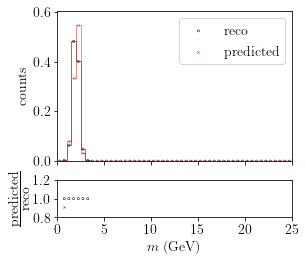

<Figure size 432x288 with 0 Axes>

In [42]:
# TODO: plot the loss curves (train and valid) of all 4 networks on the same plot,
# and with the learning rate plotted on the same plot but on a different y axis 
# (x axis being iteration, with marks indicating epochs)

target = "RecoDatam"
source = FIELDS[target]
features = source["inputs"]
print("Training Features:\n", features)
print("\nTarget = ", target)
AUTOREGRESSIVE_DIST_NAME = "AUTOREGRESSIVE_m_Prime.csv"
print("USING NEW DATASET\n")
######################################
USE_BRADEN_SCALING = True
#####################################
################################### CONFIGURATIONS ###################################

JUPYTER = True
use_subsample = False
# use_subsample = True
if use_subsample:
    SUBSAMPLE = int(
        1e5
    )  # subsample use for development - in production use whole dataset
else:
    SUBSAMPLE = None

########################################################################################
# Get targets and features
if USE_BRADEN_SCALING==True:
    print(f"spliting data for {target}")
    train_t, train_x = split_t_x(
        df=scaled_train_data, target=target, input_features=features
    )
    print("train_t shape = ", train_t.shape, "train_x shape = ", train_x.shape)
    print("\n Training features:\n")
    print(train_x)
    valid_t, valid_x = split_t_x(
        df=scaled_valid_data, target=target, input_features=features
    )
    print("valid_t shape = ", valid_t.shape, "valid_x shape = ", valid_x.shape)
    test_t, test_x = split_t_x(
        df=scaled_test_data, target=target, input_features=features
    )
    print("test_t shape = ", test_t.shape, "test_x shape = ", test_x.shape)

else:
    print(f"spliting data for {target}")
    train_t, train_x = normal_split_t_x(
        df=raw_train_data, target=target, input_features=features
    )
    print("train_t shape = ", train_t.shape, "train_x shape = ", train_x.shape)
    print("\n Training features:\n")
    print(train_x)
    valid_t, valid_x = normal_split_t_x(
        df=raw_valid_data, target=target, input_features=features
    )
    print("valid_t shape = ", valid_t.shape, "valid_x shape = ", valid_x.shape)
    test_t, test_x = normal_split_t_x(
        df=raw_test_data, target=target, input_features=features
    )
    print("test_t shape = ", test_t.shape, "test_x shape = ", test_x.shape)

print("no need to train_test_split since we already have the split dataframes")
print(valid_x.mean(axis=0), valid_x.std(axis=0))
print(train_x.mean(axis=0), train_x.std(axis=0))
print(valid_t.mean(), valid_t.std())
print(train_t.mean(), train_t.std())
######################################################

# Apply z scaling to features and targets
# to features

NFEATURES = train_x.shape[1]
TRAIN_SCALE_DICT = get_train_scale_dict(USE_BRADEN_SCALING)
# to features
apply_z_generator = apply_z_to_features(TRAIN_SCALE_DICT, train_x, test_x, valid_x)
train_x_z_scaled = next(apply_z_generator)
test_x_z_scaled = next(apply_z_generator)
valid_x_z_scaled = next(apply_z_generator)
print(valid_x_z_scaled.mean(axis=0), valid_x_z_scaled.std(axis=0))
print(train_x_z_scaled.mean(axis=0), train_x_z_scaled.std(axis=0))
# to targets
apply_z_to_targets_generator = apply_z_to_targets(train_t, test_t, valid_t)
train_t_z_scaled = next(apply_z_to_targets_generator)
test_t_z_scaled = next(apply_z_to_targets_generator)
valid_t_z_scaled = next(apply_z_to_targets_generator)
print(valid_t_z_scaled.mean(), valid_t_z_scaled.std())
print(train_t_z_scaled.mean(), train_t_z_scaled.std())

###########################################################
# @utils.debug
def load_model(PATH, PARAMS):
    # n_layers = int(BEST_PARAMS["n_layers"])
    # hidden_size = int(BEST_PARAMS["hidden_size"])
    # dropout = float(BEST_PARAMS["dropout"])
    # optimizer_name = BEST_PARAMS["optimizer_name"].to_string().split()[1]
    # learning_rate =  float(BEST_PARAMS["learning_rate"])
    # batch_size = int(BEST_PARAMS["batch_size"])
    model = RegularizedRegressionModel(
        nfeatures=NFEATURES,
        ntargets=1,
        nlayers=PARAMS["n_layers"],
        hidden_size=PARAMS["hidden_size"],
        dropout_1=PARAMS["dropout_1"],
        dropout_2=PARAMS["dropout_2"],
        activation=PARAMS["activation"],
    )
    model.load_state_dict(torch.load(PATH))
    # OR
    # model=torch.load(PATH)#BUT HERE IT WILL BE A DICT (CANT BE EVALUATED RIGHT AWAY) DISCOURAGED! Also, use dictionary ".pth" which has both the model state dict and the PARAMS dict
    model.eval()
    print(model)
    return model.to(device)
############################################################
# Get the  parameters for this model and training
PARAMS_m = {
"n_layers": int(5),
"hidden_size": int(5),
"dropout_1": float(0.6),
"dropout_2": float(0.1),
"activation": "LeakyReLU",
    'optimizer_name':'NAdam',
    'starting_learning_rate':float(0.5),
    'momentum':float(0.6),
    'batch_size':int(512),
    'n_iterations': int(1e6),
}

optimizer_name = PARAMS_m["optimizer_name"]
print(type(optimizer_name))
# optimizer_name = BEST_PARAMS["optimizer_name"].to_string().split()[1]
NITERATIONS = PARAMS_m["n_iterations"]
BATCHSIZE = PARAMS_m["batch_size"]
comment = ""

# N_epochs X N_train_examples = N_iterations X batch_size
N_epochs = (NITERATIONS * BATCHSIZE) / int(train_x.shape[0])
print(
    f"This model was trained for {NITERATIONS} iteration, which is  {N_epochs} epochs"
)

# 'Trained_IQNx4_%s_TUNED.dict' % target
filename_model = utils.get_model_filename(target, PARAMS_m)
# OR, if you know a model filename directly, you can also specify it, 
# BUT, if you pull a trained model explicitly, you have to make sure its parameters in the PARAMS dictionary above match
# Nominal one is 'Trained_IQNx4_RecoDatam_ 8_layer5_hiddenLeakyReLU_activation1024_batchsize300_Kiteration.dict', also in backup
# filename_model='Trained_IQNx4_RecoDatam_ 8_layer5_hiddenLeakyReLU_activation1024_batchsize300_Kiteration.dict'
# filename_model='Trained_IQNx4_RecoDatapT_10_layer6_hiddenLeakyReLU_activation512_batchsize300_Kiteration.dict'

trained_models_dir = "trained_models"
utils.mkdir(trained_models_dir)
# on cluster, Im using another TRAIN directory
PATH_model = os.path.join(
    IQN_BASE,  # the loaction of the repo
    "JupyterBook",  # up tp TRAIN could be combined in a srs dicretory
    "Cluster",
    "TRAIN",
    trained_models_dir,  # /trained_models
    filename_model,  # utils.get_model_filename has the saved file format
)

# Load trained model
IQN_m = load_model(PATH_model, PARAMS_m)
# Get predicted distribution
p = simple_eval(IQN_m, test_x_z_scaled)

range_ = (FIELDS[target]["xmin"], FIELDS[target]["xmax"])
bins = 50
if USE_BRADEN_SCALING==True:
  REAL_RAW_DATA = scaled_test_data
else:
  REAL_RAW_DATA = raw_test_data

YLIM = (0.8, 1.2)
###########GET REAL DIST###########
REAL_RAW_DATA = REAL_RAW_DATA[
    ["RecoDatapT", "RecoDataeta", "RecoDataphi", "RecoDatam"]
]
REAL_RAW_DATA.columns = ["realpT", "realeta", "realphi", "realm"]
REAL_DIST = REAL_RAW_DATA["realm"]
norm_data = REAL_RAW_DATA.shape[0]
#############GET EVALUATION DIST#############
if USE_BRADEN_SCALING==True:
  scaled_test_data.describe()
  m_reco = scaled_test_data["RecoDatam"]
  m_gen = scaled_test_data["genDatam"]
else:  
  raw_test_data.describe()
  m_reco = raw_test_data["RecoDatam"]
  m_gen = raw_test_data["genDatam"]
# plt.hist(m_reco,label=r'$m_{gen}^{test \ data}$');plt.legend();plt.show()


def descale_Braden_scaled_prediction(label, p):
    """Label could be m. p is the outcome of the model evaluation, e.g. 
    IQN_m = load_model(PATH_model, PARAMS_m)
    p = simple_eval(IQN_m, test_x_z_scaled)
    
    """
    # make sure you've set braden scaling global variable to use this function.
    assert USE_BRADEN_SCALING==True
    orig_ratio = T(label, scaled_df=scaled_train_data)
    z_inv_f = z_inverse(xprime=p, mean=np.mean(orig_ratio), std=np.std(orig_ratio))
    L_obs = L(orig_observable=m_gen, label=label)
    z_inv_f = z_inv_f.flatten()
    print(z_inv_f.shape)

    factor = (z_inv_f * (L_obs + 10)) - 10
    label_pred = L_inverse(L_observable=factor, label=label)
    return label_pred
    
    
m_pred = z_inverse2(
    xprime=p,
    train_mean=TRAIN_SCALE_DICT[target]["mean"],
    train_std=TRAIN_SCALE_DICT[target]["std"],
)
m_pred = m_pred.flatten()

# Get histogram of predicted distribution
real_label_counts_m, predicted_label_counts_m, label_edges_m = get_hist_simple(
    predicted_dist=m_pred, target=target
)
eval_data=pd.read_csv(DATA_DIR+'/test_data_10M_2.csv')
# Get evaluation data
# eval_data = pd.read_csv(DATA_DIR + "/test_data_10M_2.csv")
ev_features = features
eval_data = eval_data[ev_features]
# save new distribution (m) in the eval data as autoregressive eval for next IQN
eval_data[target] = m_pred

new_cols = [target] + features
eval_data = eval_data.reindex(columns=new_cols)
print("EVALUATION DATA NEW INDEX\n", eval_data.head())

eval_data.to_csv(
    os.path.join(
        IQN_BASE, 
        "JupyterBook", 
        "Cluster", 
        # "EVALUATE", 
        AUTOREGRESSIVE_DIST_NAME
    )
)

# Load this saved predited autoregressive distribution
AUTOREGRESSIVE_DIST = pd.read_csv(
    os.path.join(
        IQN_BASE, 
        "JupyterBook", 
        "Cluster", 
        # "EVALUATE", 
        AUTOREGRESSIVE_DIST_NAME
    )
)

# norm_IQN=AUTOREGRESSIVE_DIST.shape[0]
# get normalization values
norm_autoregressive = AUTOREGRESSIVE_DIST.shape[0]
norm_IQN = norm_autoregressive
print(
    "norm_data",
    norm_data,
    "\nnorm IQN",
    norm_IQN,
    "\nnorm_autoregressive",
    norm_autoregressive,
)

# Finally, plot predicted distribution

plot_one(
    target=target,
    real_edges=label_edges_m,
    real_counts=real_label_counts_m,
    predicted_counts=predicted_label_counts_m,
    save_plot=True,
    PARAMS=PARAMS_m
)